In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#importing the dataset
data = pd.read_csv('soybean.csv')
display(data.head())

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [3]:
# Separate the class (y) from the predictor variables (x)
predictor = data.iloc[:,0:35].values
class_ = data.iloc[:,35].values

In [4]:
# Transformation of categorical attributes into numerical attributes, passing the index of each categorical column
label = LabelEncoder()

for i in range(0,35):
    predictor[:,i] = label.fit_transform(predictor[:,i])

display(predictor)

array([[6, 2, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 2, 1, 2],
       [3, 2, 1, ..., 2, 1, 2],
       ...,
       [4, 1, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3],
       [4, 1, 0, ..., 0, 0, 3]], dtype=object)

In [5]:
#Division of dataset into train and test (70% for training and 30% for testing)
x_train, x_test, y_train, y_test = train_test_split(predictor, class_, test_size = 0.4, random_state = 0)

In [6]:
# Create a support vector machine classifier
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [7]:
#Predict the response for test dataset
prediction = svm.predict(x_test)

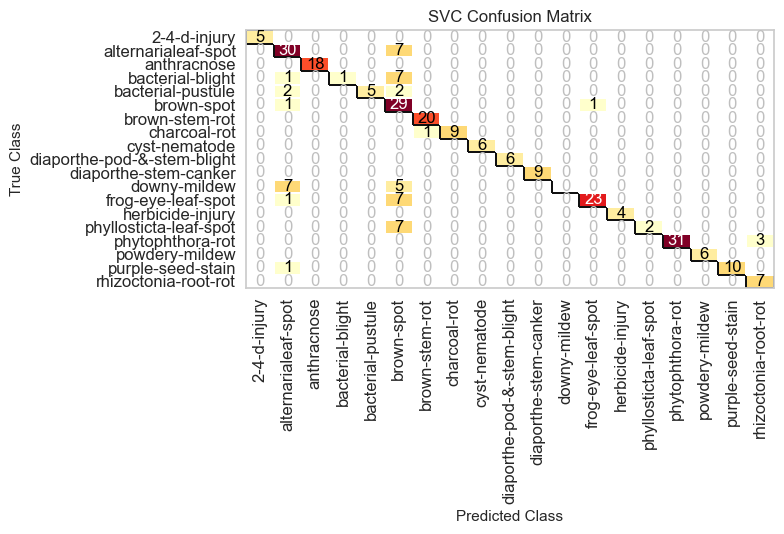

<AxesSubplot: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [8]:
#Display the confusion matrix
conf_image = ConfusionMatrix(SVC())
conf_image.fit(x_train, y_train)
conf_image.score(x_test, y_test)
conf_image.poof()

In [9]:
#Calculate the accuracy of the model
ACC = accuracy_score(y_test, prediction)
print(f"Accuracy: {ACC*100:.1f} %")

Accuracy: 80.7 %


In [10]:
# Use of the ExtraTreesClassifier algorithm to extract the most important characteristics
forest = ExtraTreesClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
importances

array([0.05065587, 0.02165771, 0.03346836, 0.03119079, 0.02558848,
       0.02034415, 0.02764848, 0.03013691, 0.01793549, 0.01639606,
       0.02826134, 0.01639788, 0.04394016, 0.05331353, 0.04732912,
       0.02957423, 0.01675024, 0.0258293 , 0.0304556 , 0.00941753,
       0.03574837, 0.03801688, 0.03108027, 0.03333914, 0.00653975,
       0.03787585, 0.01788373, 0.05977845, 0.03991118, 0.02890049,
       0.02600736, 0.02127449, 0.01827348, 0.00750718, 0.02157215])

In [26]:
# Sorting the list
big = list(set(importances))
big.sort()

#Define the number of features to be used in model construction
n = 25

# Finding the biggest importances
best_importances = []
for i in range(1,n+1):
    print(big[-i])
    big_index = np.where(importances == big[-i])
    best_importances.append(big_index[0][0])

print(best_importances)
print(data.columns[best_importances])

0.059778454959369454
0.05331352927325436
0.050655869080573214
0.04732912133222202
0.043940158828570136
0.039911183083391734
0.038016878062799436
0.037875846756606116
0.035748370278246816
0.03346835698418352
0.03333913608459333
0.0311907912797532
0.031080270426289247
0.030455596292332444
0.030136906424411466
0.02957422878354562
0.02890048520696964
0.02826134343516629
0.027648482895531123
0.026007364103038447
0.0258293023395979
0.02558847908460473
0.02165771228683046
0.021572147933314866
0.02127449275305582
[27, 13, 0, 14, 12, 28, 21, 25, 20, 2, 23, 3, 22, 18, 7, 15, 29, 10, 6, 30, 17, 4, 1, 34, 31]
Index(['fruit-pods', 'leafspots-marg', 'date', 'leafspot-size',
       'leafspots-halo', 'fruit-spots', 'canker-lesion', 'int-discolor',
       'stem-cankers', 'precip', 'external-decay', 'temp', 'fruiting-bodies',
       'stem', 'severity', 'leaf-shread', 'seed', 'plant-growth',
       'area-damaged', 'mold-growth', 'leaf-mild', 'hail', 'plant-stand',
       'roots', 'seed-discolor'],
      

In [27]:
# Creation of a new database using only the most important attributes
x_train2 = x_train[:,best_importances]
x_test2 = x_test[:,best_importances]

In [28]:
# Create another model with reduced database, training and obtaining predictions
svm2 = SVC()
svm2.fit(x_train2, y_train)
prediction2 = svm2.predict(x_test2)

In [29]:
#Calculate the accuracy of the new model
ACC2 = accuracy_score(y_test, prediction2)
print(f"Accuracy: {ACC2*100:.1f} %")

Accuracy: 82.1 %


In [30]:
#summary of the results
if ACC2 > ACC:
    print(f'The attribute selection improved the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )
else:
    print(f'The attribute selection did not improve the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )

The attribute selection improved the accuracy of the model : 80.7 --> 82.1 %
